# File to do Porto Taxi Trajectory Similiarity

### Step 1

Open the code/global_variables.py file, [or just click here](global_variables.py). And edit the values to fit the given experiment, the name of the chosen subset ("subset-*size*) and the size of the subset. As well as the coordinates of the geographical area.


### Step 2

Make sure you have the needed files/folders for the chosen subset.
 - in data/raw_data there must be a .csv file with the subset of the chosen size. If not, it must be uploaded.
 - in data/chosen_data there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not, create this empty folder.
 - in data/hashed_data there must be a folder with the same name as global_variables.CHOSEN_SUBSET_NAME. If not, create this empty folder.

### Step 3

Run the cells in [code/porto-data.ipynb](porto-data.ipynb), or just run the cell below.
This will load the data from the chosen subset into the folder data/chosen_data/subset-'size', each row in the dataset is written in its own text file. I also creates a META-file which contains the name of all the text files in the subset.

(Might requires to install nbformat: "pip install nbformat")

In [6]:
%run "porto-data.ipynb"

Check the folder: data/chosen_data/subset-subset-100. Files should have been generated.


### Step 4

Run the cells in [code/lsh-grid.ipynb](lsh-grid.ipynb), or just run the cell below. This will represent each of the rows/trajectories as an hash, and create a text file for each hashed trajectory in the folder data/hashed_data/subset-'size', as well as a META file.

In [7]:
%run "lsh-grid.ipynb"

       Average runtime  Minimum runtime  Maximum runtime
porto         0.021492         0.021425         0.021628
                 Average runtime  Minimum runtime  Maximum runtime
porto_naive             4.180326         4.131812          4.22105
porto_quadrants         2.111735         1.977048          2.29845
porto_kd_tree           2.121689         2.065953          2.19822
Check the folder: data/hashed_data/subset-100. Files should have been generated.


### Step 5
Calculate similarities by running the following code

In [8]:
%run similarities-only-grid.ipynb

Check ../code/experiments/similarities/, it should be a file here named grid_porto-subset-100.csv which contains the similarities in the dataset.
 Check ../code/experiments/timing/, it should be a file here named similarity_runtimes_grid_porto-{global_variables.CHOSEN_SUBSET_NAME}.csv which contains the time spent to do the hash similarity(?)


### Step 6

Run the code below to see the clustering of the trajectories. Decide the number of clusters you want by updating number_of_trajectories.

In [9]:
#Change this to the number of clusters you want (if wanted number is more than 30: update in def plot_clusters() in hierarchical_clustering.py)
number_of_clusters = 10

/cluster/home/andrehva/.conda/envs/masteroppgave/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


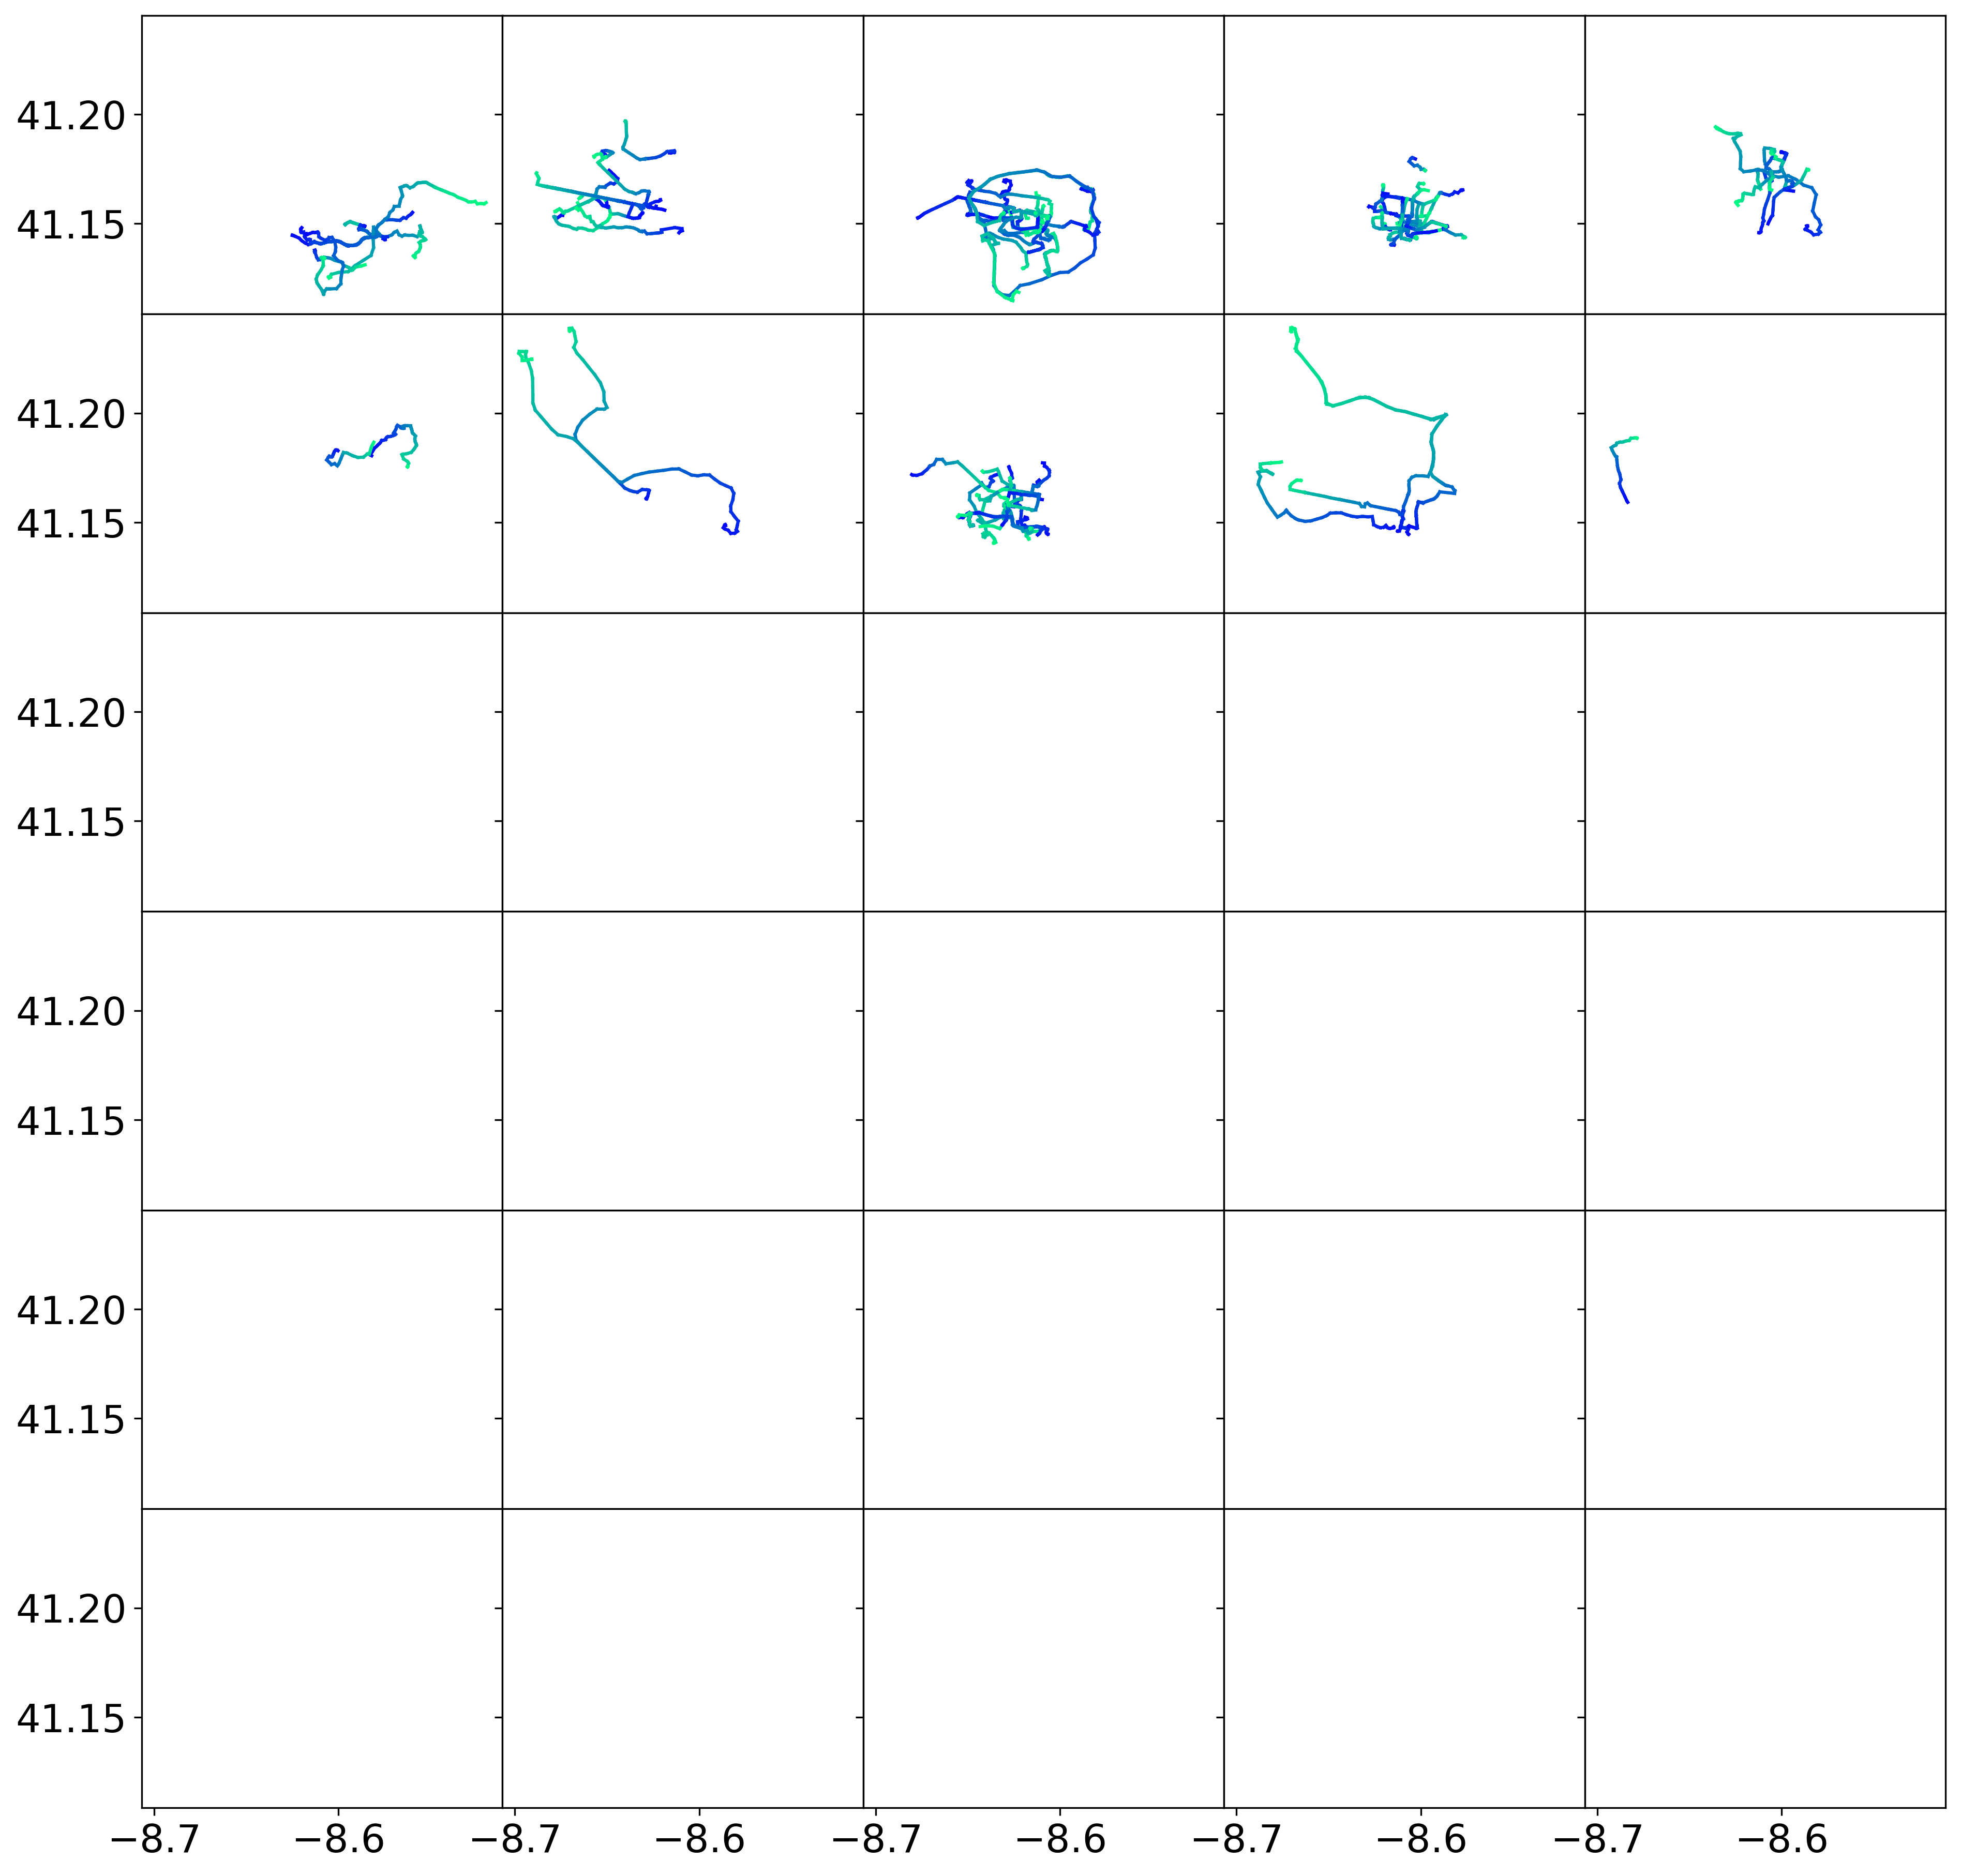

In [10]:
from experiments.hierarchical_clustering import HCA
from experiments import davies_bouldin as DB 
from sklearn import metrics as mcs

# Porto Grid similarities
#TODO: remove city
PortoGrid = HCA("Porto", f"../code/experiments/similarities/grid_porto-{global_variables.CHOSEN_SUBSET_NAME}.csv", number_of_clusters )
PortoGrid.plot_clusters("Porto - Grid")